<span style="display:none" id="qqq1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgcHVycG9zZSBvZiBjcm9zcy12YWxpZGF0aW9uIGluIG1hY2hpbmUgbGVhcm5pbmc/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUbyB0cmFpbiBtb2RlbHMgZmFzdGVyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkNyb3NzLXZhbGlkYXRpb24gaXNuJ3QgcHJpbWFyaWx5IHVzZWQgdG8gdHJhaW4gbW9kZWxzIGZhc3Rlci4gSXRzIHByaW1hcnkgcHVycG9zZSBsaWVzIGluIGFzc2Vzc2luZyB0aGUgbW9kZWwncyBwZXJmb3JtYW5jZSByYXRoZXIgdGhhbiBleHBlZGl0aW5nIHRoZSB0cmFpbmluZyBwcm9jZXNzLiJ9LCB7ImFuc3dlciI6ICJUbyBhc3Nlc3MgYSBtb2RlbCdzIHBlcmZvcm1hbmNlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ3Jvc3MgVmFsaWRhdGlvbiBhaWRzIGluIGVzdGltYXRpbmcgdGhlIG1vZGVsJ3MgcGVyZm9ybWFuY2Ugb24gdW5zZWVuIGRhdGEgYW5kIHByZXZlbnRzIG92ZXJmaXR0aW5nIG9yIHVuZGVyZml0dGluZy4ifSwgeyJhbnN3ZXIiOiAiVG8gcmVkdWNlIHRoZSBudW1iZXIgb2YgZmVhdHVyZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiQ3Jvc3MtdmFsaWRhdGlvbiBkb2Vzblx1MjAxOXQgZGlyZWN0bHkgZm9jdXMgb24gcmVkdWNpbmcgdGhlIG51bWJlciBvZiBmZWF0dXJlcy4gRmVhdHVyZSBzZWxlY3Rpb24gb3IgZGltZW5zaW9uYWxpdHkgcmVkdWN0aW9uIHRlY2huaXF1ZXMgYXJlIHNwZWNpZmljYWxseSBlbXBsb3llZCBmb3IgdGhpcyBwdXJwb3NlLiAifSwgeyJhbnN3ZXIiOiAiVG8gaW5jcmVhc2UgbW9kZWwgY29tcGxleGl0eSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJDcm9zcy12YWxpZGF0aW9uIGRvZXNuJ3QgYWltIHRvIGluY3JlYXNlIG1vZGVsIGNvbXBsZXhpdHkuIEluIGZhY3QsIGl0IGhlbHBzIGluIHByZXZlbnRpbmcgb3Zlcmx5IGNvbXBsZXggbW9kZWxzIGJ5IGFzc2Vzc2luZyB0aGVpciBwZXJmb3JtYW5jZSBvbiBkaWZmZXJlbnQgc3Vic2V0cyBvZiBkYXRhLiJ9XX1d</span>

# Cross-validation

__Cross-validation__ is a method for assessing the effectiveness of a machine learning model in which the data is divided into several subsets. The model is trained on one piece of data and tested on another. We repeat the process several times to ensure that the model generalizes well to different parts of the data, and not just to a specific subset. This helps to obtain a more objective assessment of the model's effectiveness.

For sure, the chosen approach will take into account small/large, balanced/unbalanced datasets, and time series/non-time series data.


## The main purpose

- **Better Performance Evaluation:** Since it gives a more precise estimation of the model's ability to generalize to unseen data compared to a single train-test split.

- **Hyperparameters Settings:** Through cross-validation and hyperparameter tuning, it can seen how the model performs across several folds. It can help in identifying hyperparameters with better performance.

- **Overfitting Avoidance:** Hyperparameter tuning without cross-validation might lead to overfitting to a specific train-test split. Cross-validation mitigates this risk by evaluating hyperparameters across various data subsets, ensuring better generalization.


## Train and Test splits

**Idea:** Randomly divide the data into training and test data, the same for all models. The quality of the models and resistance to overfit are checked using test data. This is a common choice and a quick to go validation method.

**Commonly used values:** 80% training and 20% test, 70% training and 30% test.

However, this approach has major **weaknesses** - direct dependence on which data was included in the train and which in the test groups, and the following approaches solve this problem.

In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('heart_data.csv\heart_data.csv')
X = df.drop("cardio", axis=1)
y = df["cardio"]
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)
print(X_train.shape)
print(X_test.shape)

(56000, 13)
(14000, 13)


# Types of Cross-validation

In [20]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## K-Fold

The **main idea** of this approach is to split the whole dataset in $K$ parts of equal size and each partition is called a **fold**.

One fold is used for validation and other $K-1$ folds are used for training the model. To use every fold as a validation set and other left-outs as a training set, this technique is repeated $k$ times until each fold is used once. This approach results in every observation being used both in train and test groups.

In [9]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

count = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 56000, Test set:14000
Fold:2, Train set: 56000, Test set:14000
Fold:3, Train set: 56000, Test set:14000
Fold:4, Train set: 56000, Test set:14000
Fold:5, Train set: 56000, Test set:14000


Now we will apply this method on different models, evaluate accuracy for every fold and output the mean.

### Logistic Regression 

In [34]:
score = cross_val_score(LogisticRegression(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.855 0.855 0.875 0.865 0.865]
Average score: 0.86


### Random Forest

In [28]:
score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.895 0.86  0.935 0.88  0.925]
Average score: 0.90


### Gradient Boosting

In [19]:
score = cross_val_score(GradientBoostingClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

NameError: name 'cross_val_score' is not defined

# KFold Model Tuning

## Logistic Regression

In [37]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(LogisticRegression(max_iter= 500, solver= algo, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')
    

Average score(newton-cg): 0.863
Average score(lbfgs): 0.863
Average score(liblinear): 0.863
Average score(sag): 0.863
Average score(saga): 0.863


## Random Forest

In [47]:
#n_estimators = [50, 100, 150, 200, 250]
max_leaf_nodes = [None, 5, 10, 15, 20]

for val in max_leaf_nodes:
    score = cross_val_score(RandomForestClassifier(max_leaf_nodes= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(None): 0.899
Average score(5): 0.871
Average score(10): 0.881
Average score(15): 0.885
Average score(20): 0.888


## Gradient Boosting

Also i can iterate through different types of parameters

In [41]:
params = {
    'n_estimators': [50, 100],
    #'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}


grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), params, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 3, 'n_estimators': 100}


In [42]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 0]


## Visualization

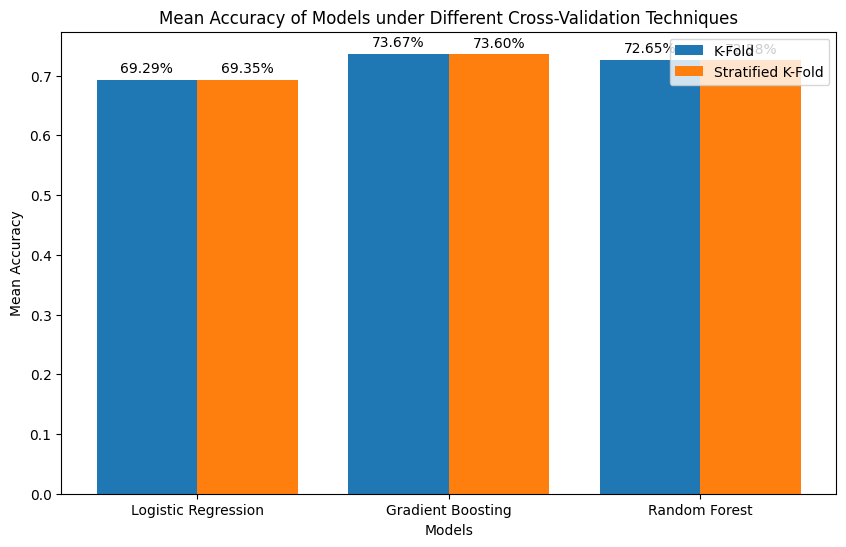

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier())
]

kfold_scores = []
stratified_kfold_scores = []

for name, model in models:
    kfold_scores.append(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy').mean())
    stratified_kfold_scores.append(cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean())


    
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
bar_positions_kfold = np.arange(len(models))
bar_positions_stratified_kfold = bar_positions_kfold + bar_width
ax.bar(bar_positions_kfold, kfold_scores, bar_width, label='K-Fold')
ax.bar(bar_positions_stratified_kfold, stratified_kfold_scores, bar_width, label='Stratified K-Fold')
ax.set_xticks(bar_positions_kfold + bar_width / 2)
ax.set_xticklabels([model[0] for model in models])
ax.set_xlabel('Models')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracy of Models under Different Cross-Validation Techniques')
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax.patches)

plt.show()

In [11]:
from jupyterquiz import display_quiz

<span style="display:none" id="qqq1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgcHVycG9zZSBvZiBjcm9zcy12YWxpZGF0aW9uIGluIG1hY2hpbmUgbGVhcm5pbmc/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUbyB0cmFpbiBtb2RlbHMgZmFzdGVyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkNyb3NzLXZhbGlkYXRpb24gaXNuJ3QgcHJpbWFyaWx5IHVzZWQgdG8gdHJhaW4gbW9kZWxzIGZhc3Rlci4gSXRzIHByaW1hcnkgcHVycG9zZSBsaWVzIGluIGFzc2Vzc2luZyB0aGUgbW9kZWwncyBwZXJmb3JtYW5jZSByYXRoZXIgdGhhbiBleHBlZGl0aW5nIHRoZSB0cmFpbmluZyBwcm9jZXNzLiJ9LCB7ImFuc3dlciI6ICJUbyBhc3Nlc3MgYSBtb2RlbCdzIHBlcmZvcm1hbmNlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ3Jvc3MgVmFsaWRhdGlvbiBhaWRzIGluIGVzdGltYXRpbmcgdGhlIG1vZGVsJ3MgcGVyZm9ybWFuY2Ugb24gdW5zZWVuIGRhdGEgYW5kIHByZXZlbnRzIG92ZXJmaXR0aW5nIG9yIHVuZGVyZml0dGluZy4ifSwgeyJhbnN3ZXIiOiAiVG8gcmVkdWNlIHRoZSBudW1iZXIgb2YgZmVhdHVyZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiQ3Jvc3MtdmFsaWRhdGlvbiBkb2Vzblx1MjAxOXQgZGlyZWN0bHkgZm9jdXMgb24gcmVkdWNpbmcgdGhlIG51bWJlciBvZiBmZWF0dXJlcy4gRmVhdHVyZSBzZWxlY3Rpb24gb3IgZGltZW5zaW9uYWxpdHkgcmVkdWN0aW9uIHRlY2huaXF1ZXMgYXJlIHNwZWNpZmljYWxseSBlbXBsb3llZCBmb3IgdGhpcyBwdXJwb3NlLiAifSwgeyJhbnN3ZXIiOiAiVG8gaW5jcmVhc2UgbW9kZWwgY29tcGxleGl0eSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJDcm9zcy12YWxpZGF0aW9uIGRvZXNuJ3QgYWltIHRvIGluY3JlYXNlIG1vZGVsIGNvbXBsZXhpdHkuIEluIGZhY3QsIGl0IGhlbHBzIGluIHByZXZlbnRpbmcgb3Zlcmx5IGNvbXBsZXggbW9kZWxzIGJ5IGFzc2Vzc2luZyB0aGVpciBwZXJmb3JtYW5jZSBvbiBkaWZmZXJlbnQgc3Vic2V0cyBvZiBkYXRhLiJ9XX1d</span>

In [12]:
display_quiz("#qqq1")

<IPython.core.display.Javascript object>

<span style="display:none" id="qqq2">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSB0ZXJtICdLJyByZXByZXNlbnQgaW4gSy1Gb2xkIENyb3NzLVZhbGlkYXRpb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUaGUgbnVtYmVyIG9mIGZlYXR1cmVzIGluIHRoZSBkYXRhc2V0IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nOigifSwgeyJhbnN3ZXIiOiAiVGhlIG51bWJlciBvZiB0aW1lcyB0aGUgbW9kZWwgaXMgdHJhaW5lZCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZzooIn0sIHsiYW5zd2VyIjogIlRoZSBudW1iZXIgb2Ygc3Vic2V0cyBpbnRvIHdoaWNoIHRoZSBkYXRhIGlzIGRpdmlkZWQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJSaWdodCEifSwgeyJhbnN3ZXIiOiAiVGhlIG51bWJlciBvZiBlcG9jaHMgZHVyaW5nIG1vZGVsIHRyYWluaW5nIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nOigifV19XQ==</span>

In [14]:
display_quiz("#qqq2")

<IPython.core.display.Javascript object>

<span style="display:none" id="qqq3">W3sicXVlc3Rpb24iOiAiSW4gYSAxMC1mb2xkIGNyb3NzLXZhbGlkYXRpb24gb24gYSBkYXRhc2V0IHdpdGggMTAwMCBzYW1wbGVzLCBob3cgbWFueSBzYW1wbGVzIGFyZSB1c2VkIGZvciB2YWxpZGF0aW9uIGluIGVhY2ggZm9sZD8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIjEwIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nOigifSwgeyJhbnN3ZXIiOiAiOTAiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3Jvbmc6KCJ9LCB7ImFuc3dlciI6ICIxMDAiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJSaWdodCEgSW4gMTAtZm9sZCBjcm9zcy12YWxpZGF0aW9uLCB0aGUgZGF0YXNldCBpcyBkaXZpZGVkIGludG8gMTAgZXF1YWwgcGFydHMgb3IgZm9sZHMuIER1cmluZyBlYWNoIGl0ZXJhdGlvbiwgb25lIGZvbGQgaXMgdXNlZCBmb3IgdmFsaWRhdGlvbiwgd2hpbGUgdGhlIHJlbWFpbmluZyBuaW5lIGZvbGRzIGFyZSB1c2VkIGZvciB0cmFpbmluZyB0aGUgbW9kZWwuICJ9LCB7ImFuc3dlciI6ICIxMTAiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3Jvbmc6KCJ9XX1d</span>

In [15]:
display_quiz("#qqq3")

<IPython.core.display.Javascript object>

<span style="display:none" id="qqq4">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgbWFpbiBkaXNhZHZhbnRhZ2Ugb2YgTGVhdmUtT25lLU91dCBDcm9zcy1WYWxpZGF0aW9uIGNvbXBhcmVkIHRvIG90aGVyIGNyb3NzLXZhbGlkYXRpb24gbWV0aG9kcz8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkl0IHJlcXVpcmVzIG1vcmUgY29tcHV0YXRpb25hbCByZXNvdXJjZXMiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJSaWdodCEgTE9PQ1YgaW52b2x2ZXMgY3JlYXRpbmcgYXMgbWFueSBmb2xkcyBhcyB0aGVyZSBhcmUgc2FtcGxlcyBpbiB0aGUgZGF0YXNldCwgcmVzdWx0aW5nIGluIGEgbGFyZ2UgbnVtYmVyIG9mIG1vZGVsIGZpdHMuICJ9LCB7ImFuc3dlciI6ICJJdCB0ZW5kcyB0byBvdmVyZml0IHRoZSBtb2RlbCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJMT09DViBkb2VzIG5vdCBpbmhlcmVudGx5IGxlYWQgdG8gb3ZlcmZpdHRpbmcuIn0sIHsiYW5zd2VyIjogIkl0IGlzIGJpYXNlZCB0b3dhcmRzIHNtYWxsZXIgZGF0YXNldHMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTE9PQ1YgaXNuJ3QgcGFydGljdWxhcmx5IGJpYXNlZCB0b3dhcmRzIHNtYWxsZXIgZGF0YXNldHMuICJ9LCB7ImFuc3dlciI6ICJJdCBjYW4gYmUgY29tcHV0YXRpb25hbGx5IHNsb3cgZm9yIGxhcmdlIGRhdGFzZXRzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIml0J3MgdHJ1ZSB0aGF0IExPT0NWIGNhbiBiZSBjb21wdXRhdGlvbmFsbHkgc2xvdywgZXNwZWNpYWxseSBmb3IgbGFyZ2VyIGRhdGFzZXRzLCB0aGlzIGlzbid0IGl0cyBwcmltYXJ5IGRpc2FkdmFudGFnZS4ifV19XQ==</span>

In [17]:
display_quiz("#qqq4")

<IPython.core.display.Javascript object>

<span style="display:none" id="qqq5">W3sicXVlc3Rpb24iOiAiV2hpY2ggb2YgdGhlIGZvbGxvd2luZyBzdGF0ZW1lbnRzIGFib3V0IFN0cmF0aWZpZWQgSy1Gb2xkIENyb3NzLVZhbGlkYXRpb24gaXMgdHJ1ZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkl0IHNodWZmbGVzIHRoZSBkYXRhIGJlZm9yZSBzcGxpdHRpbmcgaW50byBmb2xkcyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJTaHVmZmxpbmcgY2FuIGJlIGVtcGxveWVkIGluIHZhcmlvdXMgY3Jvc3MtdmFsaWRhdGlvbiBtZXRob2RzLCBidXQgaXQncyBub3QgaW5oZXJlbnQgdG8gdGhlIGRlZmluaXRpb24gb2YgU3RyYXRpZmllZCBLLUZvbGQuIn0sIHsiYW5zd2VyIjogIkl0IHByZXNlcnZlcyB0aGUgcGVyY2VudGFnZSBvZiBzYW1wbGVzIGZvciBlYWNoIGNsYXNzIGluIGV2ZXJ5IGZvbGQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJTdHJhdGlmaWVkIEstRm9sZCBDcm9zcy1WYWxpZGF0aW9uIGVuc3VyZXMgdGhhdCBlYWNoIGZvbGQgb2YgdGhlIGNyb3NzLXZhbGlkYXRpb24gcmV0YWlucyB0aGUgc2FtZSBjbGFzcyBkaXN0cmlidXRpb24gYXMgdGhlIG9yaWdpbmFsIGRhdGFzZXQuICJ9LCB7ImFuc3dlciI6ICJJdCBvbmx5IHdvcmtzIHdpdGggcmVncmVzc2lvbiBwcm9ibGVtcyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJTdHJhdGlmaWVkIEstRm9sZCBDcm9zcy1WYWxpZGF0aW9uIGlzIGNvbW1vbmx5IHVzZWQgaW4gY2xhc3NpZmljYXRpb24gdGFza3MuIn0sIHsiYW5zd2VyIjogIkl0IHJhbmRvbWx5IHNlbGVjdHMgYSBzaW5nbGUgc2FtcGxlIGFzIHRoZSB2YWxpZGF0aW9uIHNldCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJTdHJhdGlmaWVkIEstRm9sZCBDcm9zcy1WYWxpZGF0aW9uIGRvZXMgbm90IHJhbmRvbWx5IHNlbGVjdCBhIHNpbmdsZSBzYW1wbGUgZm9yIHZhbGlkYXRpb24uIn1dfV0=</span>

In [18]:
display_quiz("#qqq5")

<IPython.core.display.Javascript object>